# SETTINGS


In [1]:
import torch
import torchvision
from script import *
from visualization import *
from train_and_test import *
from app_8 import *
from app_1 import *
from app_3 import *
from app_4 import *

In [2]:
BATCH_SIZE = 32
NUM_EPOCHS = 100

# Applying APP8 and creating Train, Validation and Test DataLoaders

len train:  1436
len val:  358
len test:  75


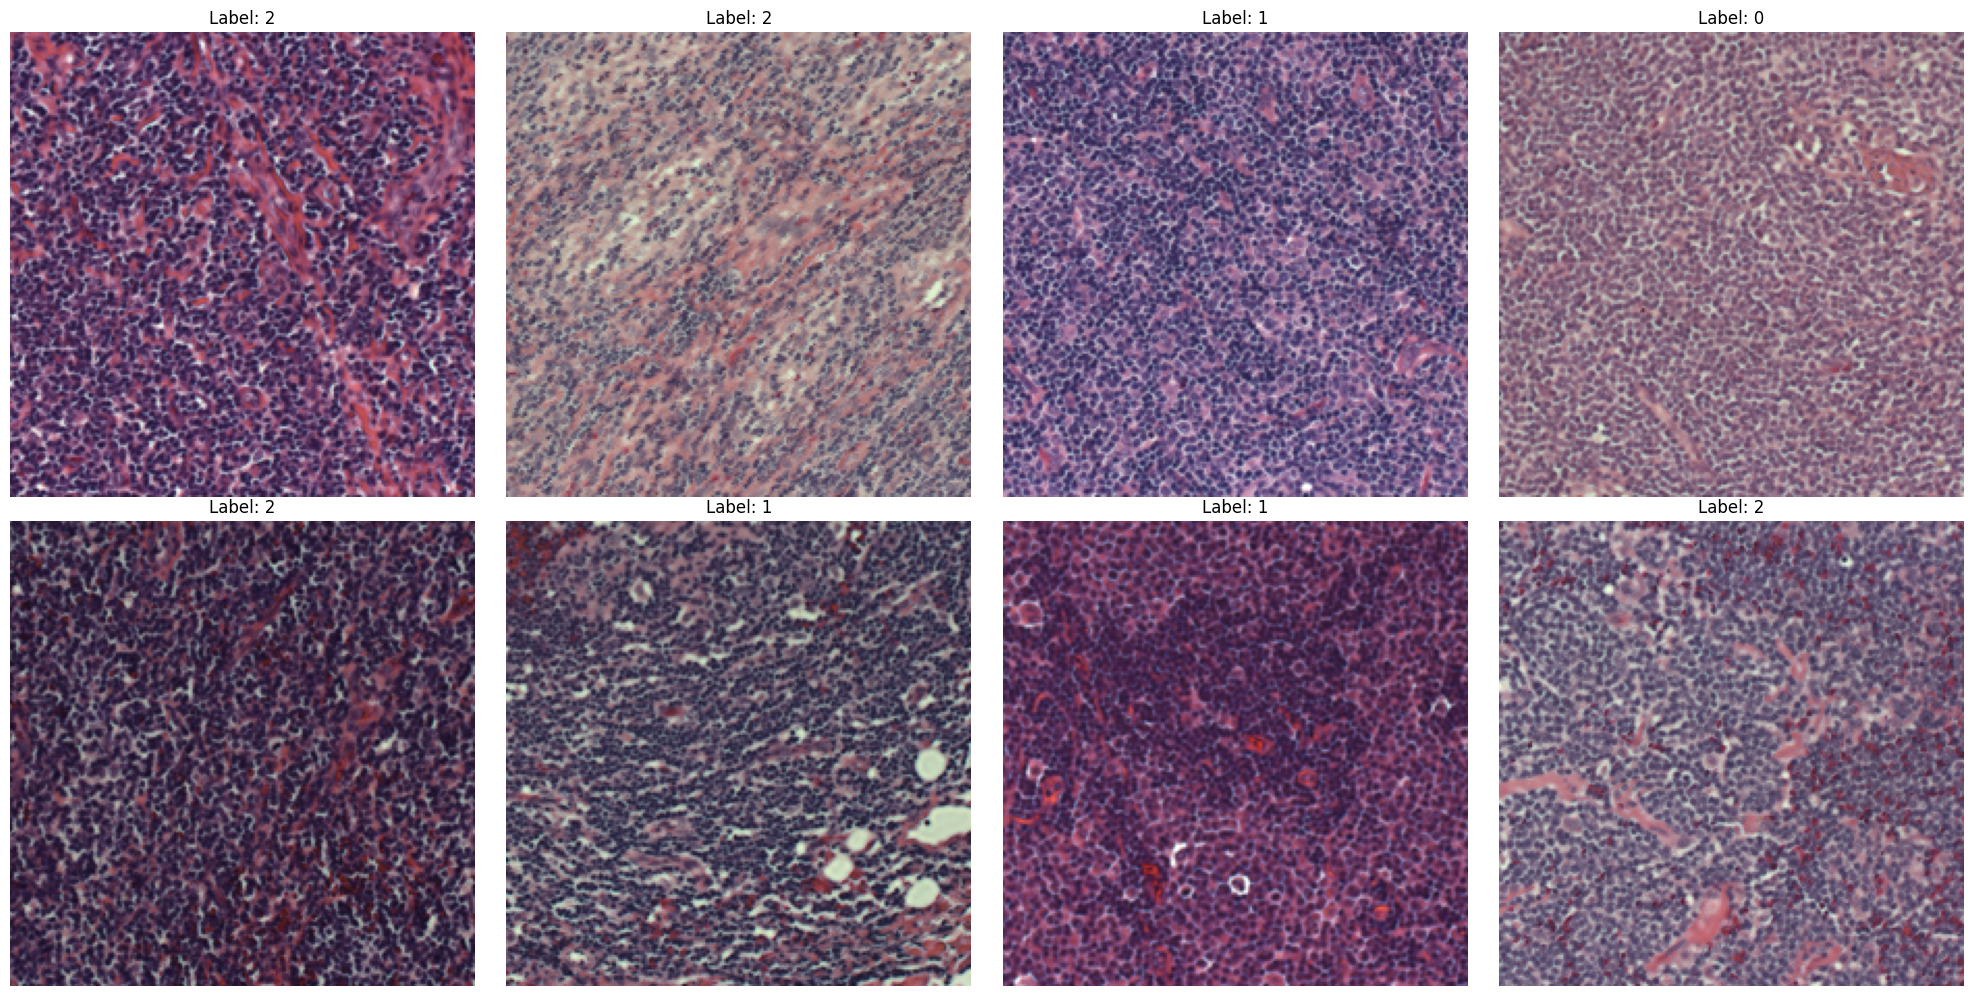

In [3]:

dm = MyDataModule(batch_size=BATCH_SIZE, transform=APP8.APP8, augment=True)
dm.setup()
train_loader = dm.train_dataloader()
test_loader = dm.test_dataloader()
val_loader = dm.val_dataloader()

app_sample_visualizer(train_loader)


# First Model: AlexNet

In [4]:
    Alexnet_model = torchvision.models.alexnet(weights='DEFAULT')
    Alexnet_model.classifier[4] = nn.Linear(4096,1024)

    Alexnet_model.classifier[6] = nn.Linear(1024,3)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 164MB/s]  


# Train and Validation Phase

In [5]:
    tt = Train_Test(NUM_EPOCHS, Alexnet_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/Alexnet_model_app8.pth')
    tt.setup(learning_rate=0.0001)
    train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 0.9189809950945437,--- Validation loss: 0.7093312828567441
Train Accuracy: 52.37%,--- Val Accuracy: 65.64%
--------------------------


Epoch [2/100] - Train loss: 0.6954048248552679,--- Validation loss: 0.5034292799800468
Train Accuracy: 68.18%,--- Val Accuracy: 77.93%
--------------------------


Epoch [3/100] - Train loss: 0.5418614437985221,--- Validation loss: 0.4169796031780083
Train Accuracy: 76.88%,--- Val Accuracy: 81.56%
--------------------------


Epoch [4/100] - Train loss: 0.405119217952978,--- Validation loss: 0.2631216660225192
Train Accuracy: 82.03%,--- Val Accuracy: 90.22%
--------------------------


Epoch [5/100] - Train loss: 0.3328825058545243,--- Validation loss: 0.27641297360705264
Train Accuracy: 86.35%,--- Val Accuracy: 87.43%
--------------------------


Epoch [6/100] - Train loss: 0.2394607202837394,--- Validation loss: 0.18160206212677768
Train Accuracy: 89.48%,--- Val Accuracy: 91.62%
--------------------------


Epoch [7/100] -

# Plotting Result

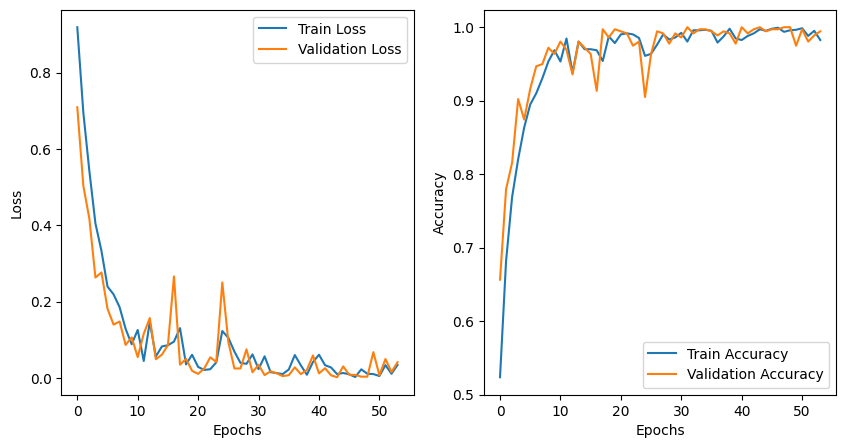

In [6]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [7]:
    tt.test()

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       1.00      0.89      0.94        27
           2       0.90      1.00      0.95        19

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

Accuracy of the network on the test images: 94.67 %


# Second Model ResNet-50

In [8]:
resnet50_model = torchvision.models.resnet50(weights='DEFAULT')
resnet50_model.fc = nn.Linear(2048,3)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 148MB/s] 


# Train and Validation Phase

In [9]:
tt = Train_Test(NUM_EPOCHS, resnet50_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/ResNet50_model_app8.pth')
tt.setup(learning_rate=0.0001)
train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 0.8421146467867668,--- Validation loss: 0.6152148916068689
Train Accuracy: 67.76%,--- Val Accuracy: 75.14%
--------------------------


Epoch [2/100] - Train loss: 0.3224682576311,--- Validation loss: 0.10191169041911317
Train Accuracy: 90.11%,--- Val Accuracy: 97.21%
--------------------------


Epoch [3/100] - Train loss: 0.1475512462157061,--- Validation loss: 0.06258145987716966
Train Accuracy: 95.54%,--- Val Accuracy: 98.32%
--------------------------


Epoch [4/100] - Train loss: 0.06789349961745705,--- Validation loss: 0.02532377202251104
Train Accuracy: 98.40%,--- Val Accuracy: 99.16%
--------------------------


Epoch [5/100] - Train loss: 0.058972266712809675,--- Validation loss: 0.01948576871118399
Train Accuracy: 98.26%,--- Val Accuracy: 99.72%
--------------------------


Epoch [6/100] - Train loss: 0.07024668469443959,--- Validation loss: 0.012764787744970045
Train Accuracy: 97.98%,--- Val Accuracy: 99.72%
--------------------------


Epoch [7/

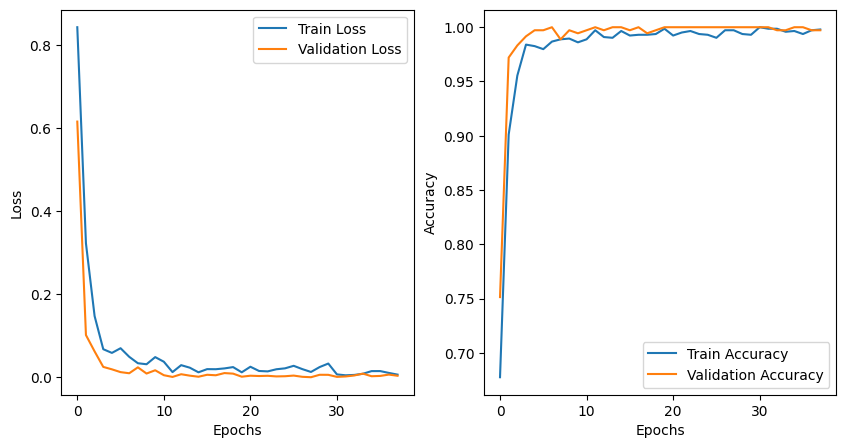

In [10]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [11]:
tt.test()


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       0.96      0.89      0.92        27
           2       0.95      0.95      0.95        19

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

Accuracy of the network on the test images: 94.67 %


# Third Model: DenseNet-121

In [12]:
densenet121_model = torchvision.models.densenet121(weights='DEFAULT')
densenet121_model.classifier = nn.Linear(1024, 3)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 135MB/s] 


# Train and Validation Phase

In [13]:
tt = Train_Test(NUM_EPOCHS, densenet121_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/DenseNet121_model_app8.pth')
tt.setup(learning_rate=0.0001)
train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 0.562304246724482,--- Validation loss: 0.30378174790123985
Train Accuracy: 76.88%,--- Val Accuracy: 89.94%
--------------------------


Epoch [2/100] - Train loss: 0.1602655683221259,--- Validation loss: 0.056226235497014485
Train Accuracy: 95.33%,--- Val Accuracy: 99.16%
--------------------------


Epoch [3/100] - Train loss: 0.10191063507146159,--- Validation loss: 0.033986913539760605
Train Accuracy: 96.45%,--- Val Accuracy: 99.16%
--------------------------


Epoch [4/100] - Train loss: 0.06177128766323531,--- Validation loss: 0.02842924976981552
Train Accuracy: 98.40%,--- Val Accuracy: 98.88%
--------------------------


Epoch [5/100] - Train loss: 0.043394553430980295,--- Validation loss: 0.022534173899642376
Train Accuracy: 98.89%,--- Val Accuracy: 98.88%
--------------------------


Epoch [6/100] - Train loss: 0.04390764357859378,--- Validation loss: 0.019965068967856842
Train Accuracy: 98.68%,--- Val Accuracy: 99.44%
--------------------------


Ep

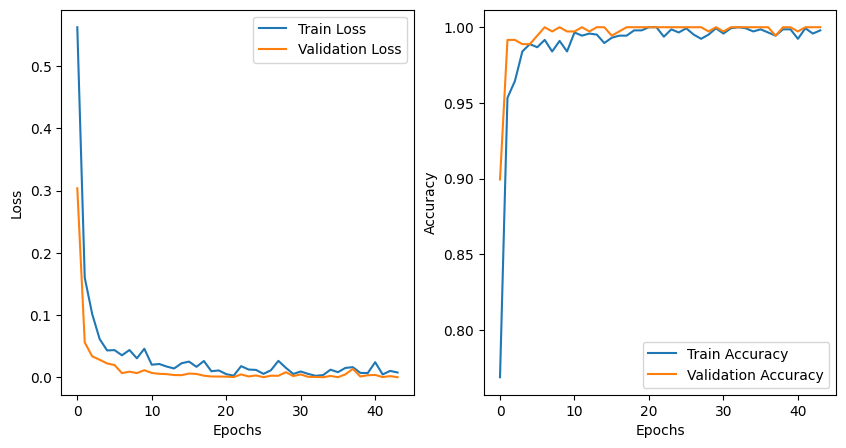

In [14]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [15]:
tt.test()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.96      0.98        27
           2       0.95      1.00      0.97        19

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

Accuracy of the network on the test images: 98.67 %
